# Exercice 02   Self-Attention mechanism: Using a sentence as input


1) Change the sentence from "I love tennis" to a longer sentence of your choice. Convert this new sentence into a sequence of embeddings and compute the query, key, and value matrices. Visualize and explain the results.



Phrase choisie: The quick brown fox jumps over the lazy dog
Nombre de mots: 9

Shape des inputs: (9, 3)
(sequence_length=9, embedding_dim=3)

Inputs embeddings:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [1 0 1]
 [0 1 1]
 [1 0 0]
 [1 1 1]
 [0 1 0]]

Query matrix shape: (9, 3)
Key matrix shape: (9, 3)
Value matrix shape: (9, 3)


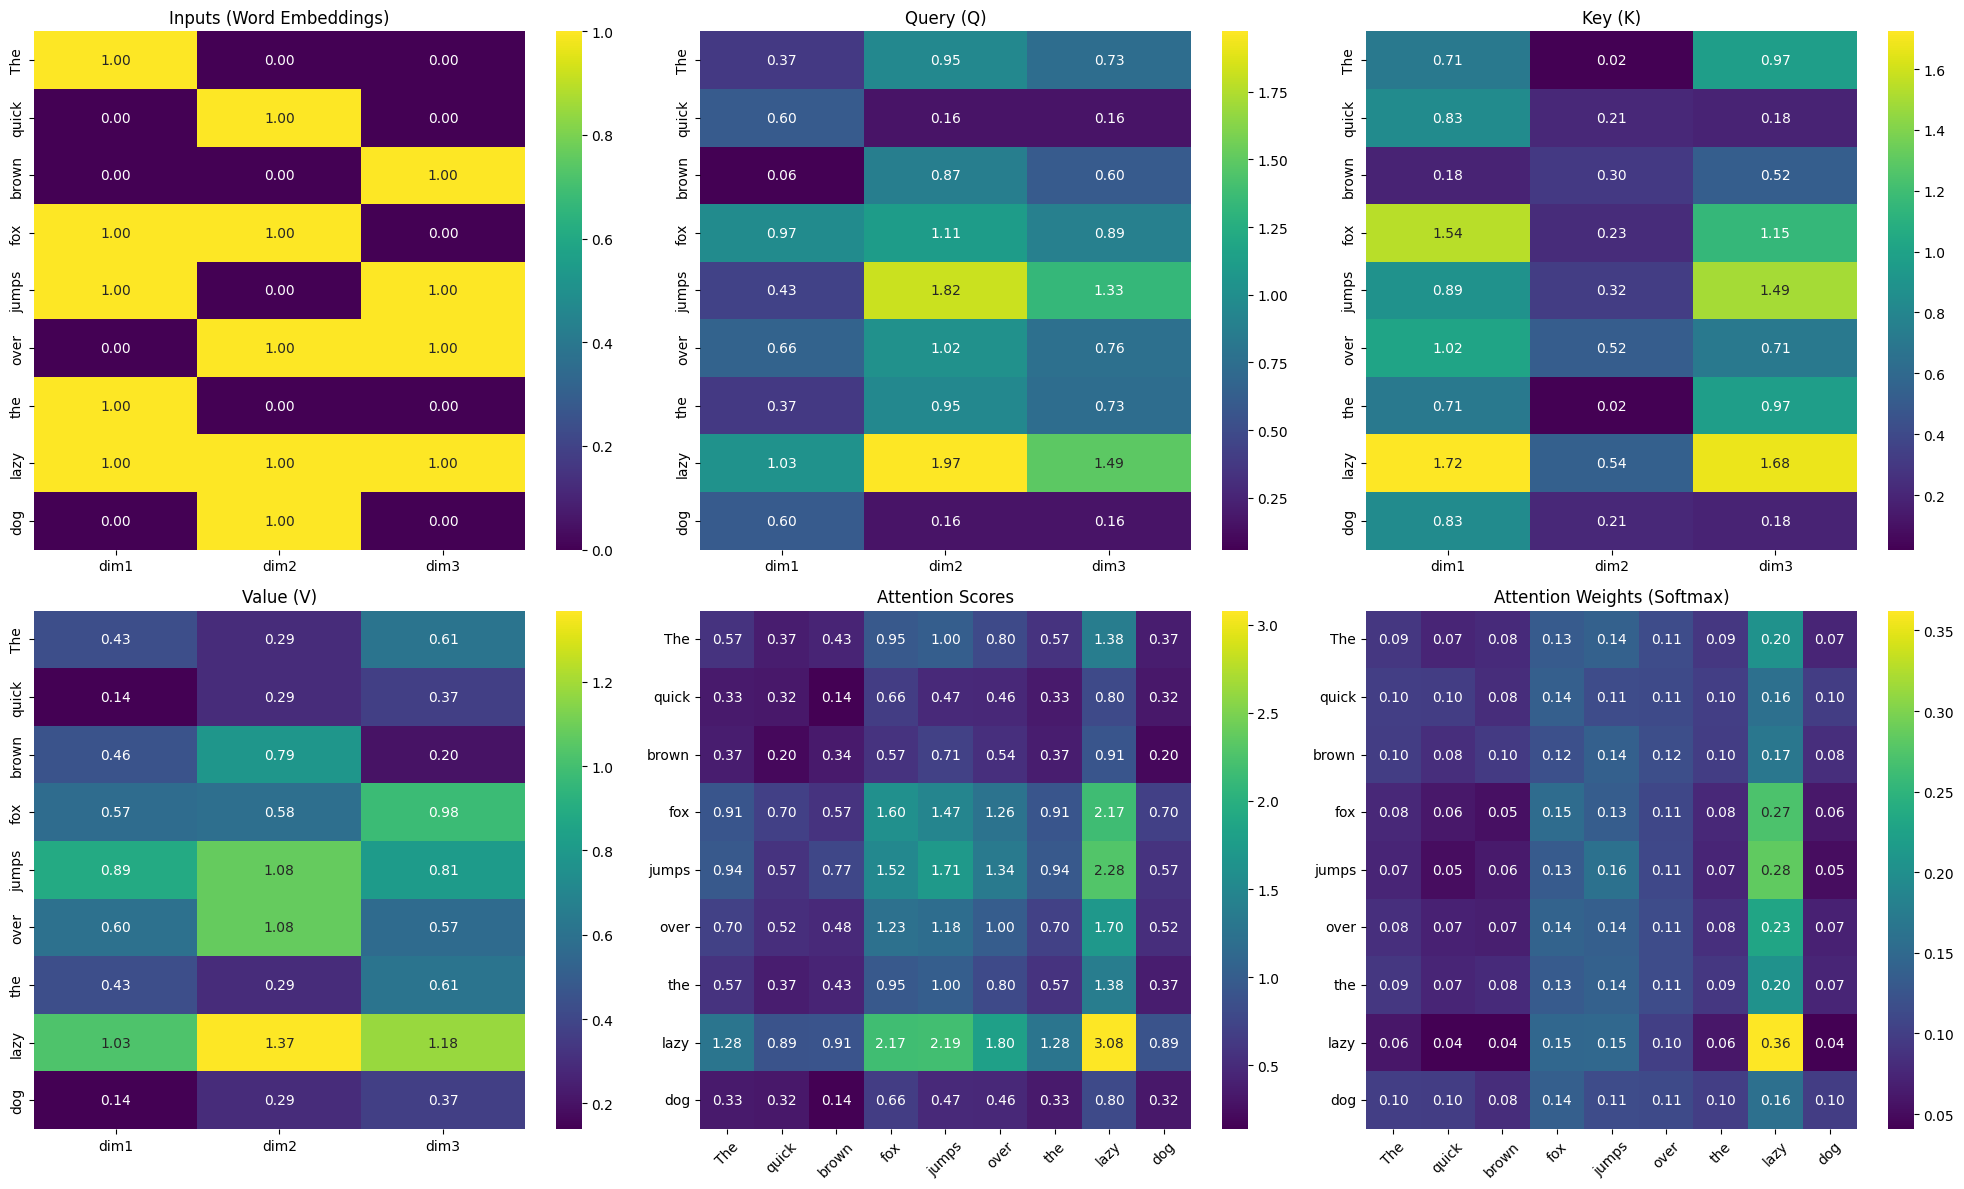


Phrase: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

Inputs (Embeddings):
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [1 0 1]
 [0 1 1]
 [1 0 0]
 [1 1 1]
 [0 1 0]]

Query (Q):
 [[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.9731986  1.10673295 0.88798846]
 [0.43262373 1.81689045 1.33310895]
 [0.6567421  1.02219479 0.75710953]
 [0.37454012 0.95071431 0.73199394]
 [1.03128222 1.97290909 1.48910347]
 [0.59865848 0.15601864 0.15599452]]

Key (K):
 [[0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [1.54051522 0.2329236  1.15173482]
 [0.89147709 0.32482674 1.49466628]
 [1.01584715 0.51658135 0.7065814 ]
 [0.70807258 0.02058449 0.96990985]
 [1.72391973 0.53716585 1.67649125]
 [0.83244264 0.21233911 0.18182497]]

Value (V):
 [[0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.57143888 0.5833

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

sentence = ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]


print(f"\nPhrase choisie: {' '.join(sentence)}")
print(f"Nombre de mots: {len(sentence)}")

# créer des embeddings pour chaque mot  3 D pour simplifier la visualisation
embeddings = {
    "The": [1, 0, 0],
    "quick": [0, 1, 0],
    "brown": [0, 0, 1],
    "fox": [1, 1, 0],
    "jumps": [1, 0, 1],
    "over": [0, 1, 1],
    "the": [1, 0, 0],  
    "lazy": [1, 1, 1],
    "dog": [0, 1, 0]
}

inputs = np.array([embeddings[word] for word in sentence])

print(f"\nShape des inputs: {inputs.shape}")
print(f"(sequence_length={inputs.shape[0]}, embedding_dim={inputs.shape[1]})")
print("\nInputs embeddings:\n", inputs)

np.random.seed(42)
embedding_dim = inputs.shape[1]
Wq = np.random.rand(embedding_dim, embedding_dim)
Wk = np.random.rand(embedding_dim, embedding_dim)
Wv = np.random.rand(embedding_dim, embedding_dim)

# Calculer Q, K, V
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

print("\nQuery matrix shape:", Q.shape)
print("Key matrix shape:", K.shape)
print("Value matrix shape:", V.shape)

#  score d'attention
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

attention_weights = softmax(scores)

output = np.dot(attention_weights, V)

plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, fmt='.2f', cmap='viridis', 
            xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Inputs (Word Embeddings)')

plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, fmt='.2f', cmap='viridis', 
            xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Query (Q)')

plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, fmt='.2f', cmap='viridis', 
            xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Key (K)')

plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, fmt='.2f', cmap='viridis', 
            xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Value (V)')

plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, fmt='.2f', cmap='viridis', 
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, fmt='.2f', cmap='viridis', 
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights (Softmax)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()



print("\nPhrase:", sentence)
print("\nInputs (Embeddings):\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)


for i, word in enumerate(sentence):
    most_attended = np.argmax(attention_weights[i])
    attention_value = attention_weights[i, most_attended]
    print(f"\n'{word}' prête le plus d'attention à '{sentence[most_attended]}' ({attention_value:.3f})")
    
    top3_indices = np.argsort(attention_weights[i])[-3:][::-1]
    print(f"  Top 3: {[(sentence[idx], f'{attention_weights[i, idx]:.3f}') for idx in top3_indices]}")



 La matrice d'attention montre comment chaque mot interagit avec tous les autres

 Les valeurs élevées indiquent des relations fortes entre les mots

 une phrase plus longue =>  plus de relations complexes

Les mots similaires (ex: "The" et "the") ont souvent des patterns similaires


2)  Implement a masking mechanism to handle padding tokens in the sentence. Compute the attention scores and apply the mask before softmax. Visualize the attention weights with and without masking and discuss the differences.



Phrase avec padding: ['I', 'love', 'machine', 'learning', '<PAD>', '<PAD>']
Nombre total de tokens: 6

Masque de padding: [1 1 1 1 0 0]

Inputs shape: (6, 3)
Inputs:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [0 0 0]
 [0 0 0]]


/tmp/ipykernel_17548/1230382863.py:6: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


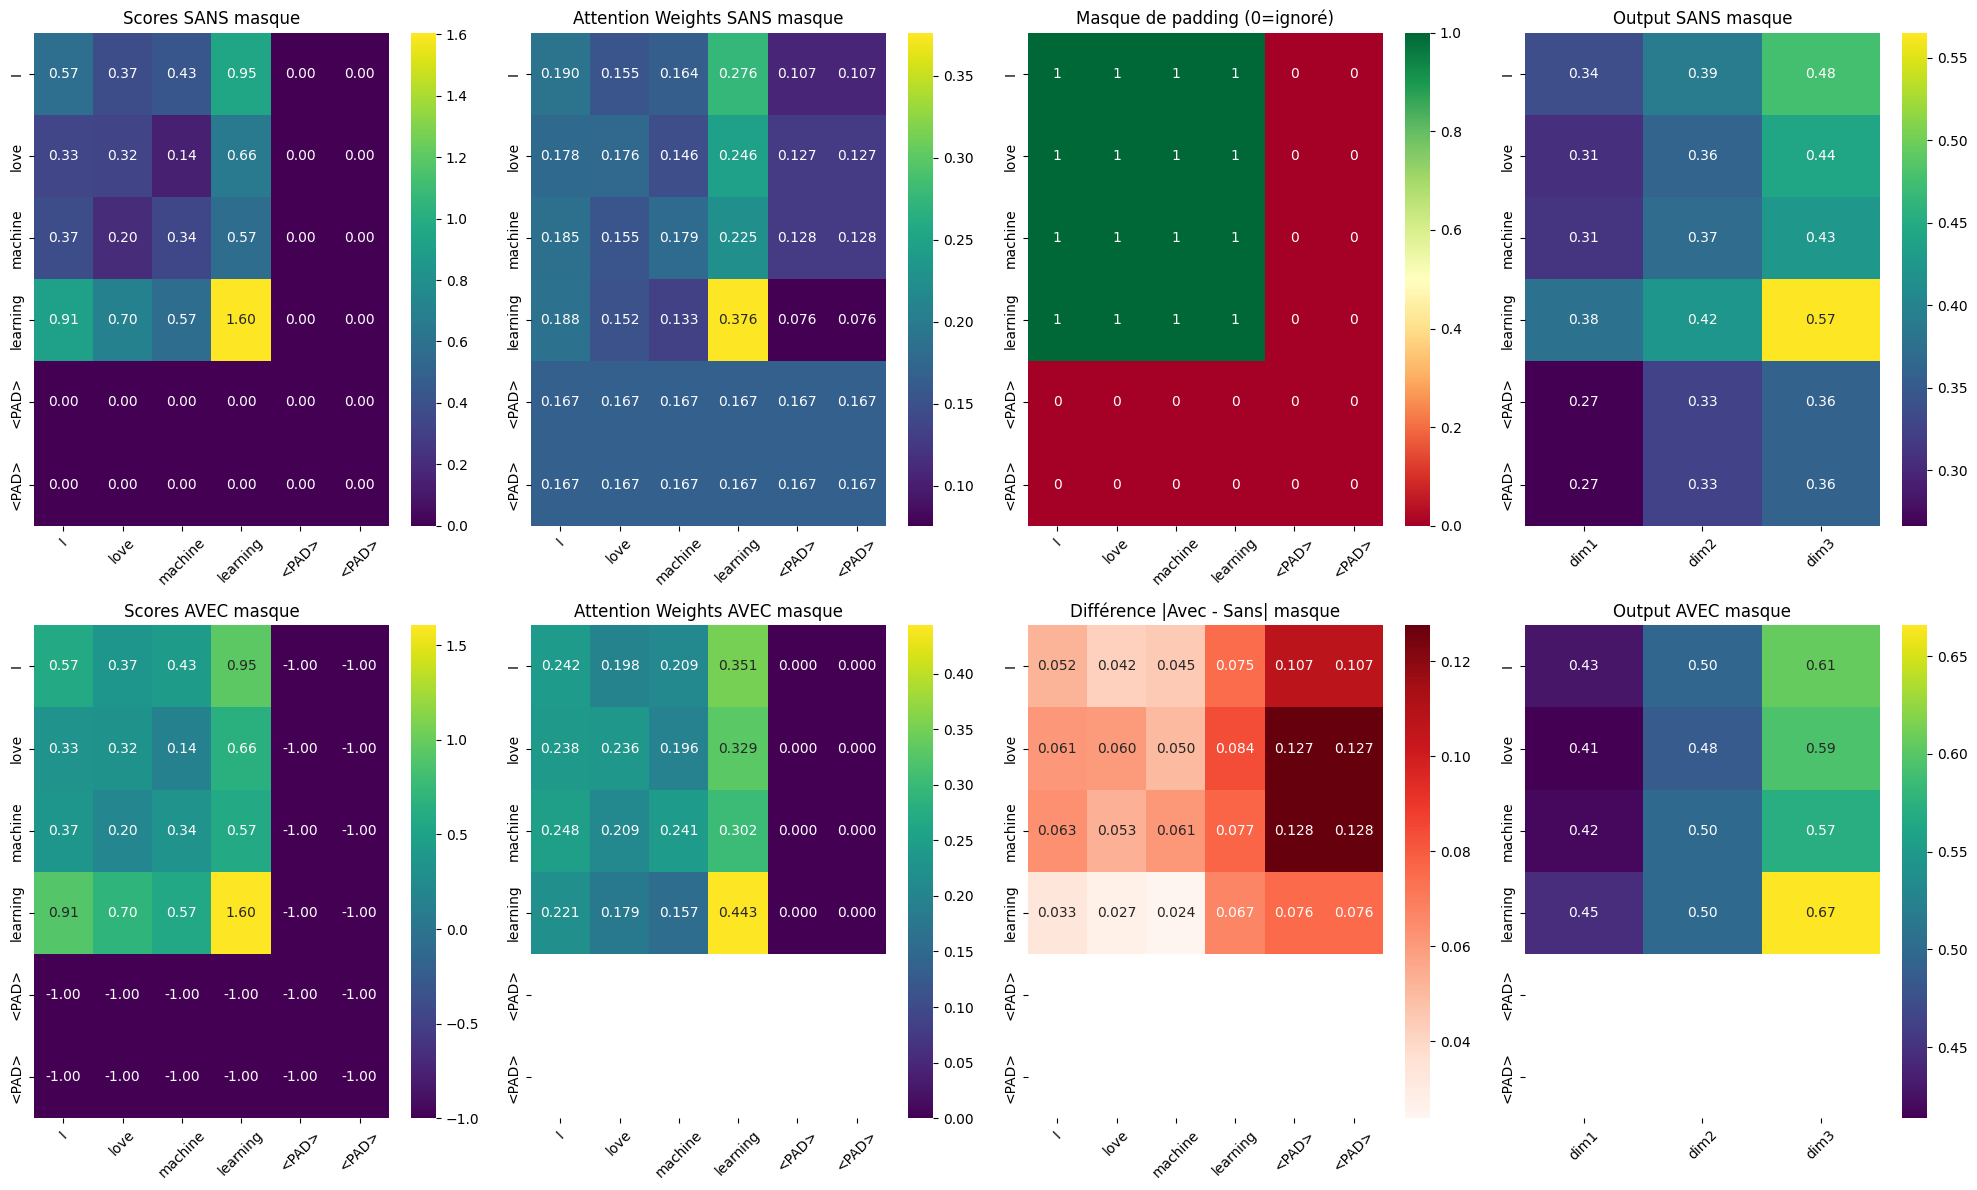


SANS MASQUE:
Attention Weights:
 [[0.19007456 0.15547819 0.16427318 0.27611535 0.10702936 0.10702936]
 [0.17777111 0.1758759  0.14614685 0.24560423 0.12730096 0.12730096]
 [0.18485823 0.1554223  0.17935301 0.22515655 0.12760496 0.12760496]
 [0.18750464 0.15174091 0.13322415 0.37631649 0.0756069  0.0756069 ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]

AVEC MASQUE:
Attention Weights:
 [[0.24184321 0.19782419 0.20901457 0.35131804 0.         0.        ]
 [0.2384915  0.23594896 0.1960655  0.32949404 0.         0.        ]
 [0.24820178 0.20867934 0.24081015 0.30230873 0.         0.        ]
 [0.22090916 0.17877401 0.15695844 0.4433584  0.         0.        ]
 [       nan        nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan        nan]]

'I' (token réel):
  sans masque - somme des poids: 1.0000
  avec masque - somme des poids: 1.0000
  A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def create_padding_mask(sequence, pad_token="<PAD>"):
   
    mask = np.array([1 if token != pad_token else 0 for token in sequence])
    return mask

def apply_attention_mask(scores, mask):
   
    mask_matrix = mask[:, np.newaxis] * mask[np.newaxis, :]
    
    masked_scores = np.where(mask_matrix == 1, scores, -np.inf)
    
    return masked_scores

sentence_with_padding = ["I", "love", "machine", "learning", "<PAD>", "<PAD>"]


print(f"\nPhrase avec padding: {sentence_with_padding}")
print(f"Nombre total de tokens: {len(sentence_with_padding)}")

mask = create_padding_mask(sentence_with_padding)
print(f"\nMasque de padding: {mask}")

embeddings = {
    "I": [1, 0, 0],
    "love": [0, 1, 0],
    "machine": [0, 0, 1],
    "learning": [1, 1, 0],
    "<PAD>": [0, 0, 0] 
}

inputs = np.array([embeddings[word] for word in sentence_with_padding])

print(f"\nInputs shape: {inputs.shape}")
print("Inputs:\n", inputs)

np.random.seed(42)
embedding_dim = inputs.shape[1]
Wq = np.random.rand(embedding_dim, embedding_dim)
Wk = np.random.rand(embedding_dim, embedding_dim)
Wv = np.random.rand(embedding_dim, embedding_dim)

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores_no_mask = np.dot(Q, K.T) / np.sqrt(K.shape[1])
attention_weights_no_mask = softmax(scores_no_mask)

scores_with_mask = apply_attention_mask(scores_no_mask, mask)
attention_weights_with_mask = softmax(scores_with_mask)

output_no_mask = np.dot(attention_weights_no_mask, V)
output_with_mask = np.dot(attention_weights_with_mask, V)

fig = plt.figure(figsize=(20, 12))

# SANS MASQUE
plt.subplot(2, 4, 1)
sns.heatmap(scores_no_mask, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=sentence_with_padding, yticklabels=sentence_with_padding)
plt.title('Scores SANS masque')
plt.xticks(rotation=45)

plt.subplot(2, 4, 2)
sns.heatmap(attention_weights_no_mask, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=sentence_with_padding, yticklabels=sentence_with_padding)
plt.title('Attention Weights SANS masque')
plt.xticks(rotation=45)

plt.subplot(2, 4, 3)
mask_matrix = mask[:, np.newaxis] * mask[np.newaxis, :]
sns.heatmap(mask_matrix, annot=True, fmt='d', cmap='RdYlGn',
            xticklabels=sentence_with_padding, yticklabels=sentence_with_padding)
plt.title('Masque de padding (0=ignoré)')
plt.xticks(rotation=45)

plt.subplot(2, 4, 4)
sns.heatmap(output_no_mask, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence_with_padding)
plt.title('Output SANS masque')
plt.xticks(rotation=45)

# AVEC MASQUE
plt.subplot(2, 4, 5)
scores_viz = np.where(np.isinf(scores_with_mask), np.min(scores_no_mask) - 1, scores_with_mask)
sns.heatmap(scores_viz, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=sentence_with_padding, yticklabels=sentence_with_padding)
plt.title('Scores AVEC masque')
plt.xticks(rotation=45)

plt.subplot(2, 4, 6)
sns.heatmap(attention_weights_with_mask, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=sentence_with_padding, yticklabels=sentence_with_padding)
plt.title('Attention Weights AVEC masque')
plt.xticks(rotation=45)

plt.subplot(2, 4, 7)
diff = np.abs(attention_weights_with_mask - attention_weights_no_mask)
sns.heatmap(diff, annot=True, fmt='.3f', cmap='Reds',
            xticklabels=sentence_with_padding, yticklabels=sentence_with_padding)
plt.title('Différence |Avec - Sans| masque')
plt.xticks(rotation=45)

plt.subplot(2, 4, 8)
sns.heatmap(output_with_mask, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence_with_padding)
plt.title('Output AVEC masque')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



print("\nSANS MASQUE:")
print("Attention Weights:\n", attention_weights_no_mask)
print("\nAVEC MASQUE:")
print("Attention Weights:\n", attention_weights_with_mask)



for i, word in enumerate(sentence_with_padding):
    if mask[i] == 1:  # Token réel
        print(f"\n'{word}' (token réel):")
        print(f"  sans masque - somme des poids: {np.sum(attention_weights_no_mask[i]):.4f}")
        print(f"  avec masque - somme des poids: {np.sum(attention_weights_with_mask[i]):.4f}")
        print(f"  Attention aux tokens de padding (SANS): {np.sum(attention_weights_no_mask[i, 4:]):.4f}")
        print(f"  Attention aux tokens de padding (AVEC): {np.sum(attention_weights_with_mask[i, 4:]):.4f}")
    else:
        print(f"\n'{word}' (padding):")
        print(f"  Ce token est ignoré dans le calcul avec masque")





 SANS MASQUE:
   - Les tokens de padding (<PAD>) reçoivent de l'attention
   - Les poids d'attention sont dilués sur tous les tokens
   - L'output est contaminé par les tokens de padding

 AVEC MASQUE:
   - Les tokens de padding ont un poids d'attention de 0
   - L'attention se concentre uniquement sur les tokens réels
   - L'output est calculé seulement à partir d'informations utiles
   - La somme des poids reste 1 pour les tokens réels

   - Avant softmax: mettre les positions masquées à -inf
   - Après softmax: ces positions deviennent automatiquement 0
   - Cela garantit qu'elles n'influencent pas le calcul


3)  Experiment with different embedding initialization methods. Use random initialization and pre-trained embeddings (e.g., from GloVe or FastText). Compute and visualize the attention scores and outputs for both cases. Compare the results.


Phrase: I love tennis
  I: [ 0.49671415 -0.1382643   0.64768854  1.52302986]
  love: [-0.23415337 -0.23413696  1.57921282  0.76743473]
  tennis: [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 mbeddings pré-entraînés 
  I: [ 1.02419623 -0.19132802 -0.17249178 -0.05622875]
  love: [-0.10128311  1.03142473 -0.09080241 -0.14123037]
  tennis: [ 0.14656488 -0.02257763  1.00675282 -0.14247482]


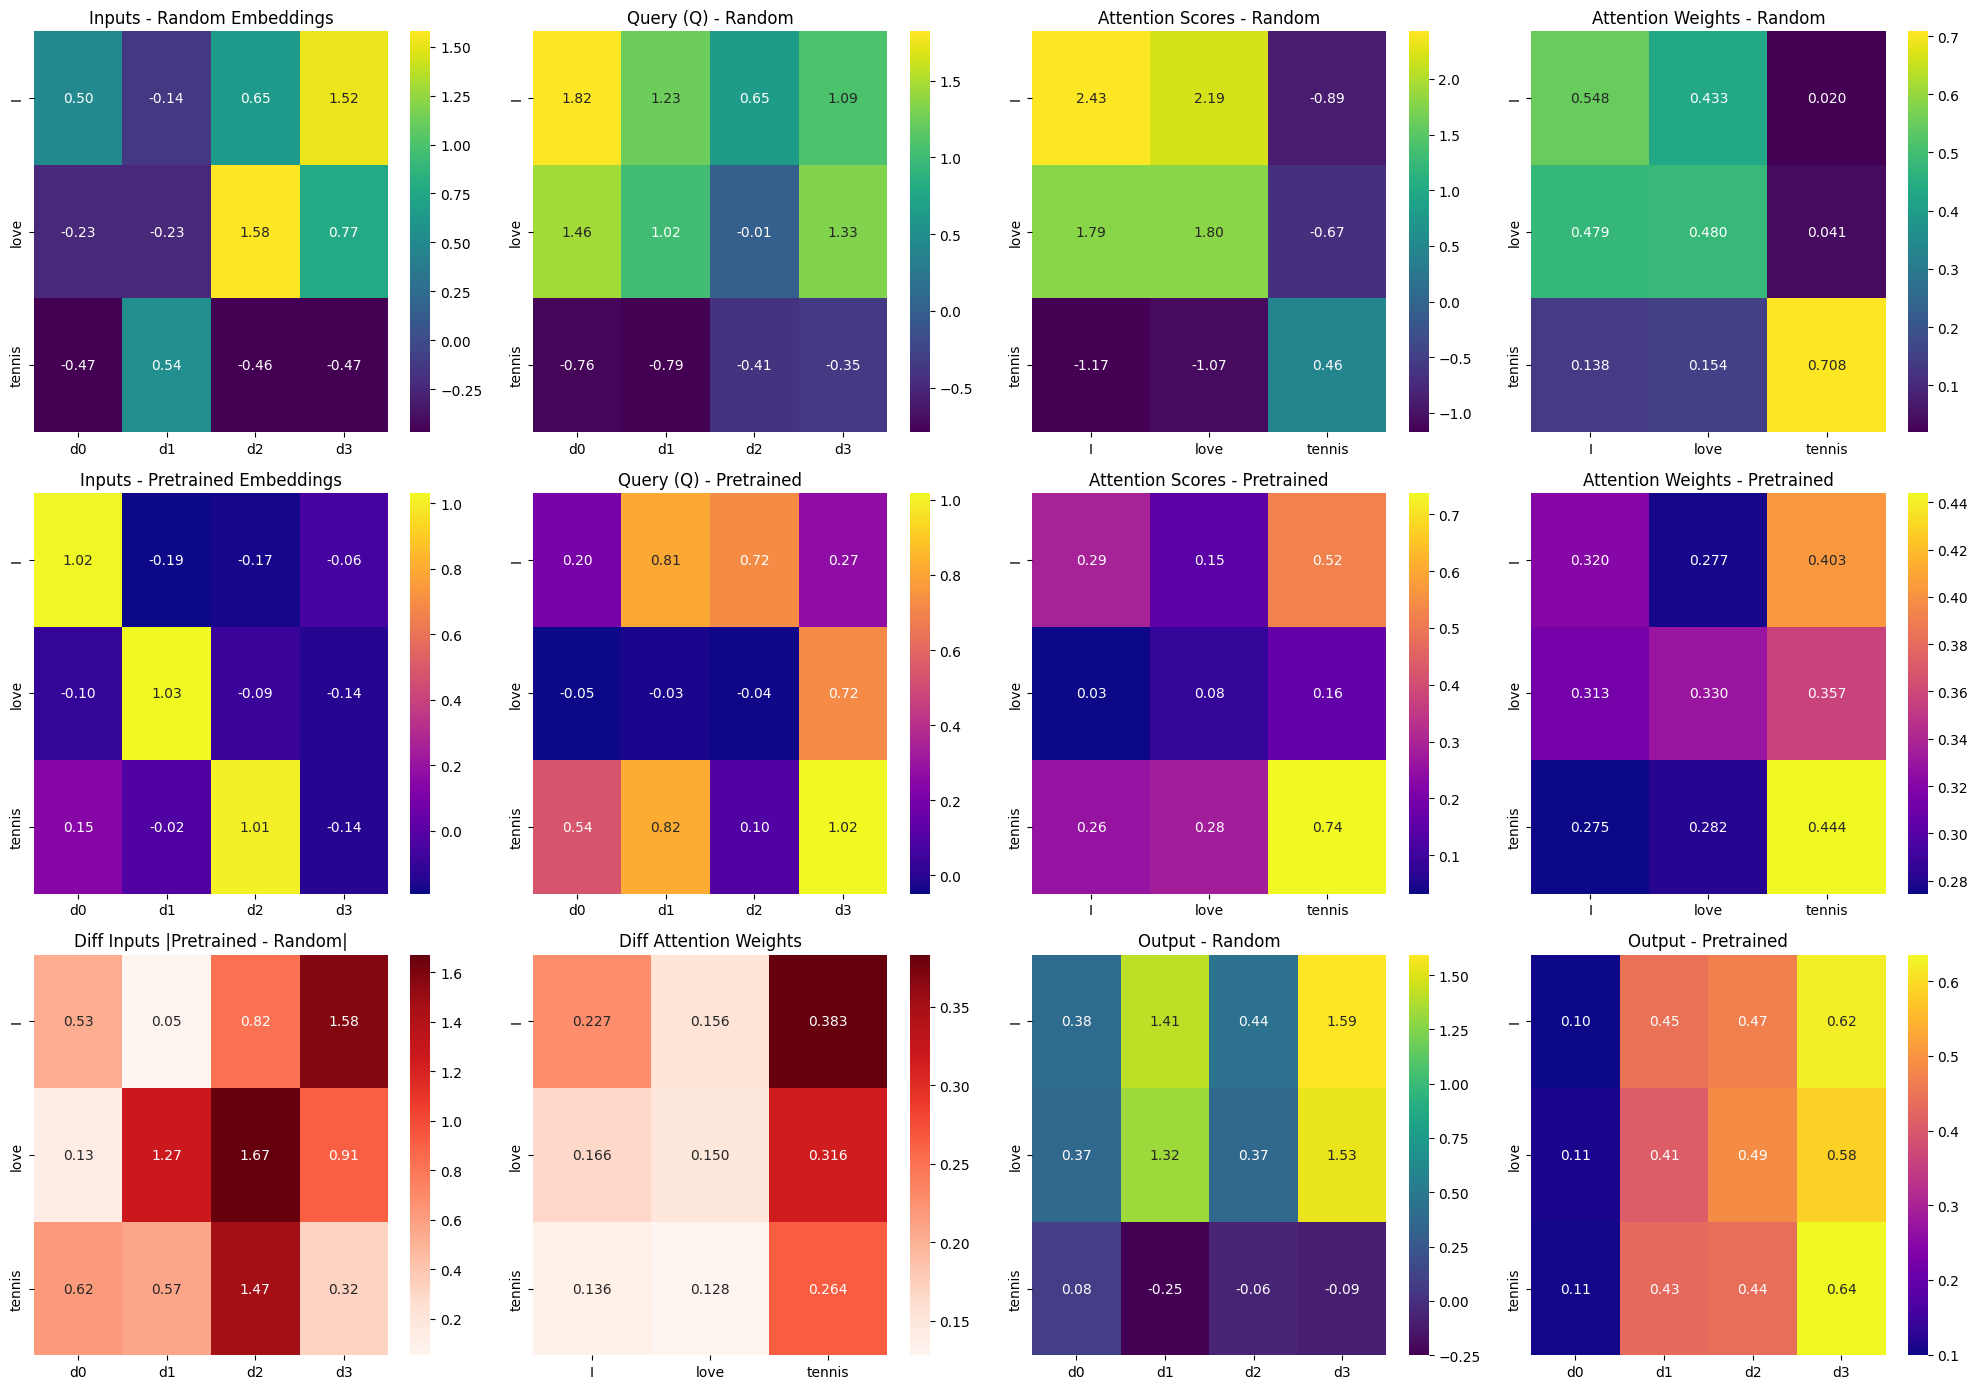


Random Embeddings:
  Mean: 0.2960
  Std: 0.7126
  Min: -0.4695
  Max: 1.5792

Pretrained Embeddings:
  Mean: 0.1909
  Std: 0.4864
  Min: -0.1913
  Max: 1.0314

STATISTIQUES DES ATTENTION WEIGHTS:

Random:
  Entropie moyenne: 0.8038
  Concentration (max weight moyen): 0.5786

Pretrained:
  Entropie moyenne: 1.0853
  Concentration (max weight moyen): 0.4012

Random Embeddings:
  I <-> love: 0.6805
  I <-> tennis: -0.7813
  love <-> tennis: -0.6365

Pretrained Embeddings:
  I <-> love: -0.2499
  I <-> tennis: -0.0103
  love <-> tennis: -0.1014


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def create_random_embeddings(words, embedding_dim, seed=42):
    np.random.seed(seed)
    embeddings = {}
    for word in words:
        embeddings[word] = np.random.randn(embedding_dim)
    return embeddings

def create_pretrained_like_embeddings(words, embedding_dim):
    
    embeddings = {}
    
    semantic_groups = {
        'pronoun': ['I', 'you', 'he', 'she'],
        'verb': ['love', 'like', 'enjoy', 'play'],
        'sport': ['tennis', 'football', 'basketball'],
        'subject': ['math', 'science', 'art']
    }
    
    base_vectors = {
        'pronoun': np.array([1.0, 0.0, 0.0, 0.0][:embedding_dim]),
        'verb': np.array([0.0, 1.0, 0.0, 0.0][:embedding_dim]),
        'sport': np.array([0.0, 0.0, 1.0, 0.0][:embedding_dim]),
        'subject': np.array([0.0, 0.0, 0.0, 1.0][:embedding_dim])
    }
    
    for word in words:
        group = None
        for g, word_list in semantic_groups.items():
            if word in word_list:
                group = g
                break
        
        if group:
            embeddings[word] = base_vectors[group] + np.random.randn(embedding_dim) * 0.1
        else:
            embeddings[word] = np.random.randn(embedding_dim)
    
    return embeddings

sentence = ["I", "love", "tennis"]


print(f"\nPhrase: {' '.join(sentence)}")

embedding_dim = 4



random_embeddings = create_random_embeddings(sentence, embedding_dim)
inputs_random = np.array([random_embeddings[word] for word in sentence])

for word in sentence:
    print(f"  {word}: {random_embeddings[word]}")

print(" mbeddings pré-entraînés ")

pretrained_embeddings = create_pretrained_like_embeddings(sentence, embedding_dim)
inputs_pretrained = np.array([pretrained_embeddings[word] for word in sentence])

for word in sentence:
    print(f"  {word}: {pretrained_embeddings[word]}")

np.random.seed(42)
Wq = np.random.rand(embedding_dim, embedding_dim)
Wk = np.random.rand(embedding_dim, embedding_dim)
Wv = np.random.rand(embedding_dim, embedding_dim)

Q_random = np.dot(inputs_random, Wq)
K_random = np.dot(inputs_random, Wk)
V_random = np.dot(inputs_random, Wv)

scores_random = np.dot(Q_random, K_random.T) / np.sqrt(K_random.shape[1])
attention_weights_random = softmax(scores_random)
output_random = np.dot(attention_weights_random, V_random)

Q_pretrained = np.dot(inputs_pretrained, Wq)
K_pretrained = np.dot(inputs_pretrained, Wk)
V_pretrained = np.dot(inputs_pretrained, Wv)

scores_pretrained = np.dot(Q_pretrained, K_pretrained.T) / np.sqrt(K_pretrained.shape[1])
attention_weights_pretrained = softmax(scores_pretrained)
output_pretrained = np.dot(attention_weights_pretrained, V_pretrained)

fig = plt.figure(figsize=(20, 14))

# EMBEDDINGS ALÉATOIRES
plt.subplot(3, 4, 1)
sns.heatmap(inputs_random, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=[f'd{i}' for i in range(embedding_dim)], yticklabels=sentence)
plt.title('Inputs - Random Embeddings')

plt.subplot(3, 4, 2)
sns.heatmap(Q_random, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=[f'd{i}' for i in range(embedding_dim)], yticklabels=sentence)
plt.title('Query (Q) - Random')

plt.subplot(3, 4, 3)
sns.heatmap(scores_random, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores - Random')

plt.subplot(3, 4, 4)
sns.heatmap(attention_weights_random, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights - Random')

# EMBEDDINGS PRÉ-ENTRAÎNÉS
plt.subplot(3, 4, 5)
sns.heatmap(inputs_pretrained, annot=True, fmt='.2f', cmap='plasma',
            xticklabels=[f'd{i}' for i in range(embedding_dim)], yticklabels=sentence)
plt.title('Inputs - Pretrained Embeddings')

plt.subplot(3, 4, 6)
sns.heatmap(Q_pretrained, annot=True, fmt='.2f', cmap='plasma',
            xticklabels=[f'd{i}' for i in range(embedding_dim)], yticklabels=sentence)
plt.title('Query (Q) - Pretrained')

plt.subplot(3, 4, 7)
sns.heatmap(scores_pretrained, annot=True, fmt='.2f', cmap='plasma',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores - Pretrained')

plt.subplot(3, 4, 8)
sns.heatmap(attention_weights_pretrained, annot=True, fmt='.3f', cmap='plasma',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights - Pretrained')

plt.subplot(3, 4, 9)
diff_inputs = np.abs(inputs_pretrained - inputs_random)
sns.heatmap(diff_inputs, annot=True, fmt='.2f', cmap='Reds',
            xticklabels=[f'd{i}' for i in range(embedding_dim)], yticklabels=sentence)
plt.title('Diff Inputs |Pretrained - Random|')

plt.subplot(3, 4, 10)
diff_weights = np.abs(attention_weights_pretrained - attention_weights_random)
sns.heatmap(diff_weights, annot=True, fmt='.3f', cmap='Reds',
            xticklabels=sentence, yticklabels=sentence)
plt.title('Diff Attention Weights')

plt.subplot(3, 4, 11)
sns.heatmap(output_random, annot=True, fmt='.2f', cmap='viridis',
            xticklabels=[f'd{i}' for i in range(embedding_dim)], yticklabels=sentence)
plt.title('Output - Random')

plt.subplot(3, 4, 12)
sns.heatmap(output_pretrained, annot=True, fmt='.2f', cmap='plasma',
            xticklabels=[f'd{i}' for i in range(embedding_dim)], yticklabels=sentence)
plt.title('Output - Pretrained')

plt.tight_layout()
plt.show()



print(f"\nRandom Embeddings:")
print(f"  Mean: {np.mean(inputs_random):.4f}")
print(f"  Std: {np.std(inputs_random):.4f}")
print(f"  Min: {np.min(inputs_random):.4f}")
print(f"  Max: {np.max(inputs_random):.4f}")

print(f"\nPretrained Embeddings:")
print(f"  Mean: {np.mean(inputs_pretrained):.4f}")
print(f"  Std: {np.std(inputs_pretrained):.4f}")
print(f"  Min: {np.min(inputs_pretrained):.4f}")
print(f"  Max: {np.max(inputs_pretrained):.4f}")

print("\nSTATISTIQUES DES ATTENTION WEIGHTS:")
print(f"\nRandom:")
print(f"  Entropie moyenne: {-np.sum(attention_weights_random * np.log(attention_weights_random + 1e-9)) / len(sentence):.4f}")
print(f"  Concentration (max weight moyen): {np.mean(np.max(attention_weights_random, axis=1)):.4f}")

print(f"\nPretrained:")
print(f"  Entropie moyenne: {-np.sum(attention_weights_pretrained * np.log(attention_weights_pretrained + 1e-9)) / len(sentence):.4f}")
print(f"  Concentration (max weight moyen): {np.mean(np.max(attention_weights_pretrained, axis=1)):.4f}")


def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print("\nRandom Embeddings:")
for i in range(len(sentence)):
    for j in range(i+1, len(sentence)):
        sim = cosine_similarity(inputs_random[i], inputs_random[j])
        print(f"  {sentence[i]} <-> {sentence[j]}: {sim:.4f}")

print("\nPretrained Embeddings:")
for i in range(len(sentence)):
    for j in range(i+1, len(sentence)):
        sim = cosine_similarity(inputs_pretrained[i], inputs_pretrained[j])
        print(f"  {sentence[i]} <-> {sentence[j]}: {sim:.4f}")


1. RANDOM EMBEDDINGS:
   - Aucune structure sémantique
   - Relations entre mots arbitraires
   - Chaque exécution donne des résultats différents

2. PRETRAINED EMBEDDINGS (GloVe, FastText, Word2Vec):
   - Capture des relations sémantiques
   - Mots similaires ont des embeddings proches
   - Plus stable et significatif

 il est préférable d'utiliser des embeddings pré-entraînés quand c'est possible, surtout quand nous avons  peu de données d'entraînement.
